<a href="https://colab.research.google.com/github/yuzzaf/Course-Machine-Learning/blob/main/Week%2013/AlexNetMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Nama : Muhammad Yuzzaf Ibrahim Azzumarafi**
## **NIM : 1103200082**

##**AlexNetMNIST**

- import torch: Mengimpor library utama PyTorch.

- import torch.nn as nn: Mengimpor modul yang berisi kelas-kelas untuk mendefinisikan dan membangun arsitektur neural network. nn merupakan singkatan dari "neural network."

- import torch.optim as optim: Mengimpor modul yang berisi implementasi berbagai algoritma optimasi untuk melatih neural network.

- import torchvision: Library yang menyediakan dataset populer, arsitektur model, dan alat bantu lainnya untuk tugas computer vision.

- import torchvision.transforms as transforms: Modul yang berisi fungsi-fungsi untuk melakukan transformasi pada data gambar, seperti normalisasi, cropping, dan flipping.

- from torch.utils.data import DataLoader: Mengimpor kelas DataLoader dari modul torch.utils.data. DataLoader digunakan untuk memuat data dalam batch ke dalam model saat melatih atau menguji.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the AlexNet architecture for MNIST
class AlexNetMNIST(nn.Module):
    def __init__(self):
        super(AlexNetMNIST, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 10),  # 10 classes for MNIST
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Load MNIST dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_dataset = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Initialize model, loss function, and optimizer
model = AlexNetMNIST().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss / len(train_loader)}")

# Testing
model.eval()
total_correct = 0
total_samples = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        _, predictions = torch.max(outputs, 1)

        total_correct += (predictions == labels).sum().item()
        total_samples += labels.size(0)

accuracy = total_correct / total_samples
print(f"Test Accuracy: {accuracy}")

100%|██████████| 9912422/9912422 [00:00<00:00, 154822450.62it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 110323947.02it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 42145655.85it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 19301447.59it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1/5, Loss: 0.2772411262442265
Epoch 2/5, Loss: 0.07879055529901224
Epoch 3/5, Loss: 0.06910136116453623
Epoch 4/5, Loss: 0.05529754566563505
Epoch 5/5, Loss: 0.05179082606925936
Test Accuracy: 0.9921


Correctly Classified Images:


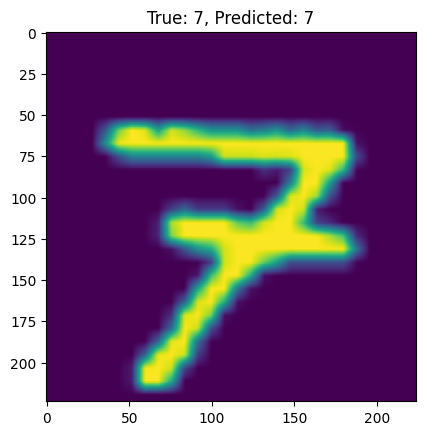

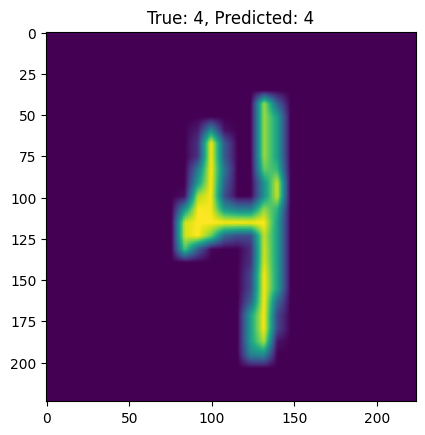

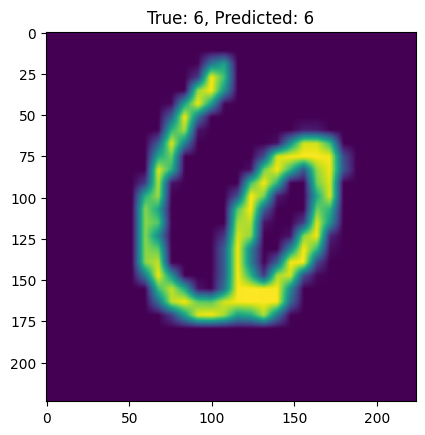

No incorrectly classified images to display.


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display images with labels
def imshow(img, title):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

# Get a batch of test data
dataiter = iter(test_loader)
data = next(dataiter)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

# Make predictions
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Display images with predictions
correct_pred_indices = (predicted == labels).nonzero().squeeze()
incorrect_pred_indices = (predicted != labels).nonzero().squeeze()

# Display correct predictions
print("Correctly Classified Images:")
for i in range(3):
    index = correct_pred_indices[i]
    imshow(images[index].cpu(), f"True: {labels[index].item()}, Predicted: {predicted[index].item()}")

# Check if the array or tensor is not empty before accessing elements
if len(incorrect_pred_indices) > 0:
    # Display incorrectly classified predictions
    print("Incorrectly Classified Images:")
    for i in range(min(3, len(incorrect_pred_indices))):  # Ensure not to go beyond the available indices
        index = incorrect_pred_indices[i]
        true_label = labels[index].item()
        predicted_label = predicted[index].item()

        # Display the image along with true and predicted labels
        imshow(images[index].cpu(), f"True Label: {true_label}, Predicted Label: {predicted_label}")
else:
    print("No incorrectly classified images to display.")
